In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-in-mathematics/Student performance in mathematics.csv')
df.head()

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74
1,2,Female,Group C,Some college,No,None,69,90,88
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44
4,5,Male,Group C,Some college,Yes,None,76,78,75


In [3]:
df["Test preparation course"].value_counts()

None         112
Completed     95
Name: Test preparation course, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Student ID                   207 non-null    int64 
 1   Gender                       207 non-null    object
 2   Race/ethnicity               207 non-null    object
 3   Parental level of education  207 non-null    object
 4   Lunch                        207 non-null    object
 5   Test preparation course      207 non-null    object
 6   Math score                   207 non-null    int64 
 7   Reading score                207 non-null    int64 
 8   Writing score                207 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 14.7+ KB


In [5]:
df.drop(['Student ID'],  axis=1, inplace=True)

In [6]:
df.describe()

,Math score,Reading score,Writing score
count,207.000000,207.000000,207.000000
mean,69.207729,69.898551,68.971014
std,13.528838,14.960607,15.843259
min,38.000000,38.000000,35.000000
25%,59.500000,59.000000,57.000000
50%,69.000000,70.000000,70.000000
75%,79.000000,80.000000,80.000000
max,98.000000,100.000000,100.000000


In [7]:
df.describe(exclude='int64')

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course
count,207,207,207,207,207
unique,2,5,6,2,2
top,Female,Group C,Some college,Yes,None
freq,105,76,61,141,112


<AxesSubplot:xlabel='Gender', ylabel='Math score'>

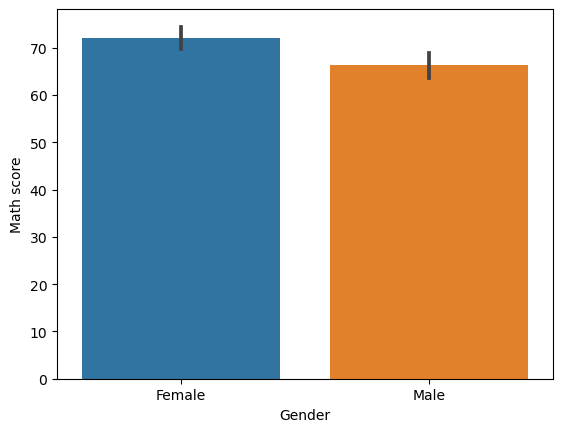

In [8]:
sns.barplot(data=df, x="Gender", y="Math score")

<AxesSubplot:xlabel='Gender', ylabel='Reading score'>

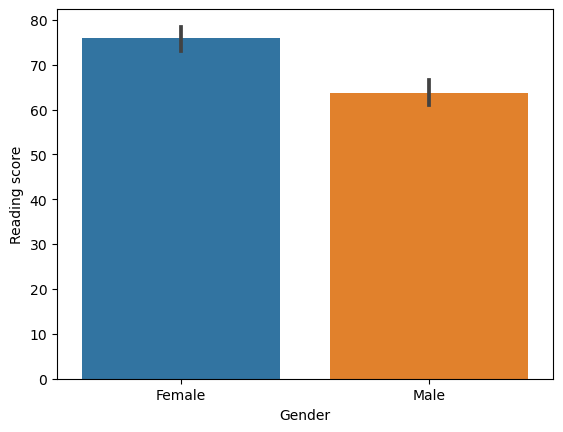

In [9]:
sns.barplot(data=df, x="Gender", y="Reading score")

<AxesSubplot:xlabel='Gender', ylabel='Writing score'>

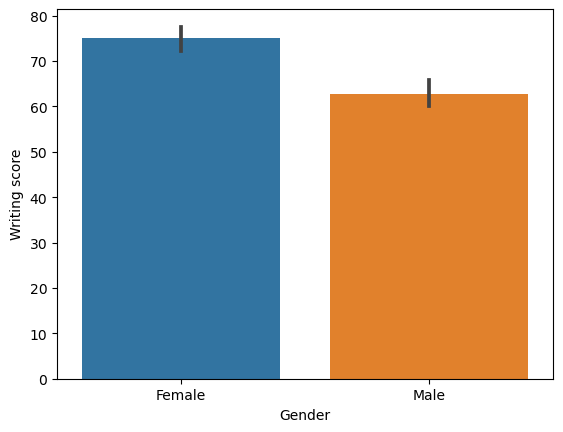

In [10]:
sns.barplot(data=df, x="Gender", y="Writing score")

<AxesSubplot:xlabel='Race/ethnicity', ylabel='Math score'>

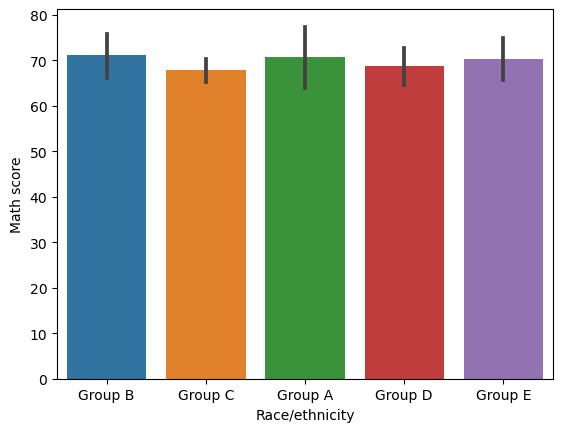

In [11]:
sns.barplot(data=df, x="Race/ethnicity", y="Math score")

<AxesSubplot:xlabel='Parental level of education', ylabel='Math score'>

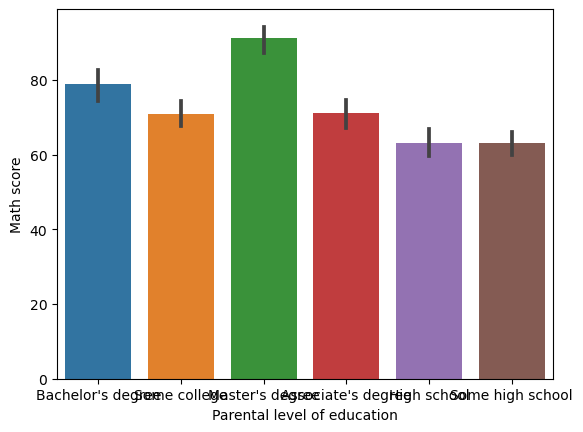

In [12]:
sns.barplot(data=df, x="Parental level of education", y="Math score")

<AxesSubplot:xlabel='Test preparation course', ylabel='Math score'>

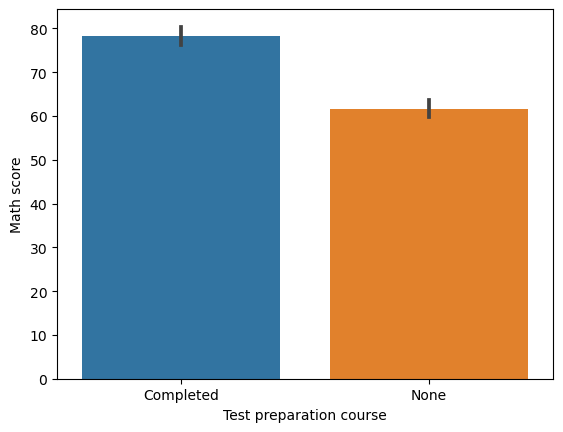

In [13]:
sns.barplot(data=df, x="Test preparation course", y="Math score")

<AxesSubplot:xlabel='Math score', ylabel='Density'>

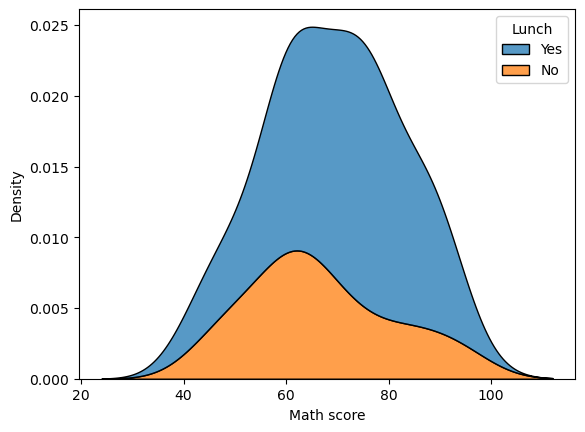

In [14]:
sns.kdeplot(data=df, x="Math score", hue="Lunch", multiple="stack")

<AxesSubplot:xlabel='Math score', ylabel='Density'>

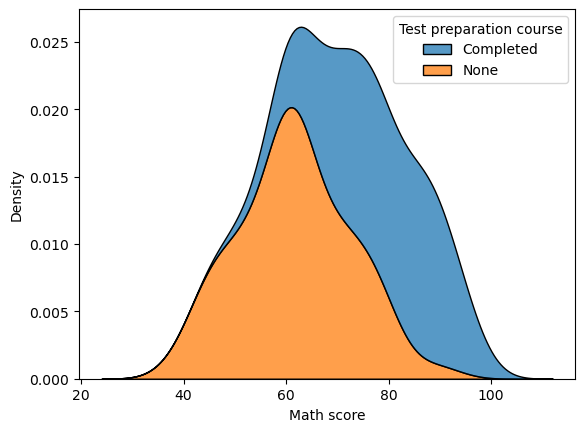

In [15]:
sns.kdeplot(data=df, x="Math score", hue="Test preparation course", multiple="stack")

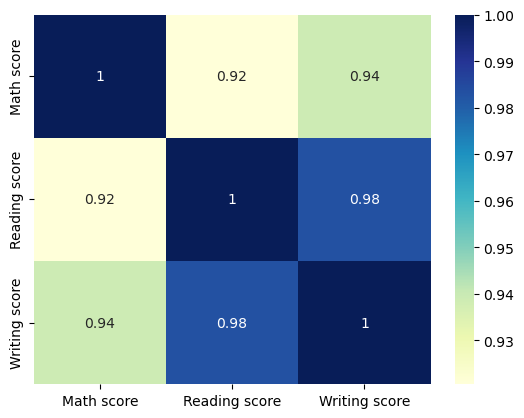

In [16]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [17]:
numerics = ['int64']
for c in [c for c in df.columns if df[c].dtype in numerics]:
    df[c] = np.log10(df[c])

In [18]:
df.columns

Index(['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score'],
      dtype='object')

In [19]:

df_t = pd.get_dummies(df, columns = ['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch'])

In [20]:
y = df_t["Test preparation course"]
X = df_t.drop(["Test preparation course"], axis=1)

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.64705882 0.82352941 0.41176471 0.58823529 0.76470588 0.6875
 0.5625     0.75       0.625      0.5625    ]
cv_scores mean:0.6422794117647059


In [22]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [23]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 12}

In [24]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7323529411764705